# Predicting if the passenger survived or not using Titanic dataset

In [1]:
##Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Importing train data

train=pd.read_csv(r"C:\Users\Dell\Desktop\Datasets\Titanic\train.csv")
train.head()
train.shape


(891, 12)

In [3]:
## Importing train data

test=pd.read_csv(r"C:\Users\Dell\Desktop\Datasets\Titanic\test.csv")
test.head()
test.shape

(418, 11)

In [4]:
train_features=train.drop('Survived',axis=1)
train_features.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_response=train.iloc[:,1]
train_response.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [6]:
df=pd.concat([train_features,test],axis=0)
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
## Knowing our data

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [8]:
##Summarising Data

df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,3.000000,80.000000,8.000000,9.000000,512.329200


<AxesSubplot:xlabel='Sex', ylabel='count'>

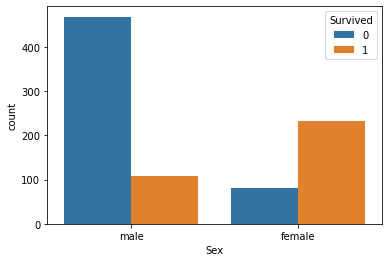

In [9]:
## Countplot for visualing male and female survivals 

sns.countplot(x ='Sex', hue = "Survived", data = train)

Text(0, 0.5, 'No. of Survivals')

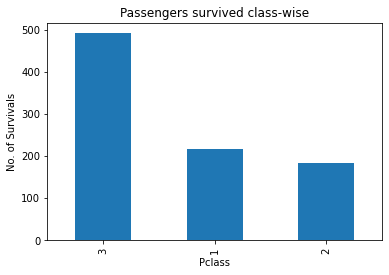

In [10]:
plt = train.Pclass.value_counts().plot(kind='bar',title='Passengers survived class-wise')
plt.set_xlabel('Pclass')
plt.set_ylabel('No. of Survivals')

In [11]:
## Checking null values

df.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

<AxesSubplot:>

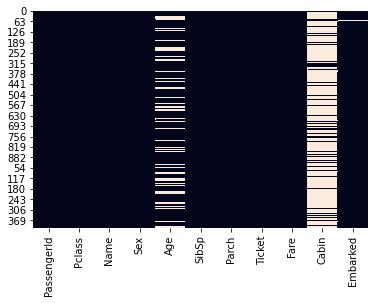

In [12]:
## Plotting null values

sns.heatmap(df.isnull(), cbar=False)

In [13]:
df1=df.drop(['Cabin','Ticket','PassengerId'],axis=1)
df1.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [14]:
df1["Age"].fillna(df1["Age"].mean(),inplace=True)
df1["Fare"].fillna(df1["Fare"].mean(),inplace=True)
df1["Embarked"].fillna(df1["Embarked"].mode()[0],inplace=True)

In [15]:
df1.isna().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

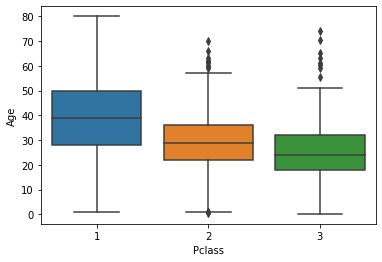

In [16]:
##Box-plot for visualising Age of people Pclass-wise

sns.boxplot(x="Pclass", y="Age", data=df)

In [17]:
## Here the boxplot represnts that the passengers of Pclass 1 had greater median age than passengers of Pclass 2 and Pclass 3.

In [18]:
## Getting Dummy variables for Sex and Pclass

sex=pd.get_dummies(df1['Sex'],drop_first=True)
pcls=pd.get_dummies(df1['Pclass'],drop_first=True)
embarked=pd.get_dummies(df1['Embarked'],drop_first=True)
embarked

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
413,0,1
414,0,0
415,0,1
416,0,1


In [19]:
## Rearranging the dataframe adding the columns with dummy variables and dropping extra columns like Pclass,Name and Sex.

titanic=pd.concat([df1,sex,pcls,embarked],axis=1)
titanic.drop(['Pclass','Name','Sex','Embarked'],axis=1,inplace=True)
titanic.head()

,Age,SibSp,Parch,Fare,male,2,3,Q,S
0,22.0,1,0,7.2500,1,0,1,0,1
1,38.0,1,0,71.2833,0,0,0,0,0
2,26.0,0,0,7.9250,0,0,1,0,1
3,35.0,1,0,53.1000,0,0,0,0,1
4,35.0,0,0,8.0500,1,0,1,0,1


In [20]:
from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()

# Using fit and transform method 
scaling.fit(titanic)
tit_data=pd.DataFrame(scaling.transform(titanic),columns=titanic.columns)
tit_data.head()

,Age,SibSp,Parch,Fare,male,2,3,Q,S
0,-0.611972,0.481288,-0.445,-0.503595,0.743497,-0.518084,0.919925,-0.32204,0.655011
1,0.630431,0.481288,-0.445,0.734503,-1.344995,-0.518084,-1.087045,-0.32204,-1.526692
2,-0.301371,-0.479087,-0.445,-0.490544,-1.344995,-0.518084,0.919925,-0.32204,0.655011
3,0.397481,0.481288,-0.445,0.382925,-1.344995,-0.518084,-1.087045,-0.32204,0.655011
4,0.397481,-0.479087,-0.445,-0.488127,0.743497,-0.518084,0.919925,-0.32204,0.655011


In [21]:
x = tit_data[0:891]
x

,Age,SibSp,Parch,Fare,male,2,3,Q,S
0,-0.611972,0.481288,-0.445000,-0.503595,0.743497,-0.518084,0.919925,-0.322040,0.655011
1,0.630431,0.481288,-0.445000,0.734503,-1.344995,-0.518084,-1.087045,-0.322040,-1.526692
2,-0.301371,-0.479087,-0.445000,-0.490544,-1.344995,-0.518084,0.919925,-0.322040,0.655011
3,0.397481,0.481288,-0.445000,0.382925,-1.344995,-0.518084,-1.087045,-0.322040,0.655011
4,0.397481,-0.479087,-0.445000,-0.488127,0.743497,-0.518084,0.919925,-0.322040,0.655011
...,...,...,...,...,...,...,...,...,...
886,-0.223721,-0.479087,-0.445000,-0.392417,0.743497,1.930190,-1.087045,-0.322040,0.655011
887,-0.844922,-0.479087,-0.445000,-0.063719,-1.344995,-0.518084,-1.087045,-0.322040,0.655011
888,0.000000,0.481288,1.866526,-0.190364,-1.344995,-0.518084,0.919925,-0.322040,0.655011
889,-0.301371,-0.479087,-0.445000,-0.063719,0.743497,-0.518084,-1.087045,-0.322040,-1.526692


In [22]:
y = train.iloc[:,1]

In [23]:
x_test=tit_data[891:]
x_test.head()

,Age,SibSp,Parch,Fare,male,2,3,Q,S
891,0.358655,-0.479087,-0.445000,-0.492396,0.743497,-0.518084,0.919925,3.105202,-1.526692
892,1.329283,0.481288,-0.445000,-0.508429,-1.344995,-0.518084,0.919925,-0.322040,0.655011
893,2.494035,-0.479087,-0.445000,-0.456465,0.743497,1.930190,-1.087045,3.105202,-1.526692
894,-0.223721,-0.479087,-0.445000,-0.476284,0.743497,-0.518084,0.919925,-0.322040,0.655011
895,-0.611972,0.481288,0.710763,-0.406194,-1.344995,-0.518084,0.919925,-0.322040,0.655011


In [24]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x, y, train_size=0.8,test_size=0.2,random_state=5)

## 1. Logistic Regression

In [25]:
## Fitting Logistic Regression 

from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression(max_iter=1000)
logmodel.fit(x,y)

print(logmodel.score(x,y),'\n')
print("score_train:",logmodel.score(x_train,y_train),'\n')
print("score_valid:",logmodel.score(x_valid,y_valid),'\n')
from sklearn.metrics import classification_report
print("classification report for train: \n ",classification_report(y_train,logmodel.predict(x_train)),'\n')
print("classification report for test: \n",classification_report(y_valid,logmodel.predict(x_valid)),'\n')

0.8047138047138047 

score_train: 0.7991573033707865 

score_valid: 0.8268156424581006 

classification report for train: 
                precision    recall  f1-score   support

           0       0.82      0.86      0.84       438
           1       0.76      0.70      0.73       274

    accuracy                           0.80       712
   macro avg       0.79      0.78      0.78       712
weighted avg       0.80      0.80      0.80       712
 

classification report for test: 
               precision    recall  f1-score   support

           0       0.84      0.89      0.86       111
           1       0.80      0.72      0.76        68

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.83      0.83      0.82       179
 



## 2. Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x,y)

print("score_train:",rfc.score(x_train,y_train),'\n')
print("score_valid:",rfc.score(x_valid,y_valid),'\n')
from sklearn.metrics import classification_report
print("classification report for train: \n ",classification_report(y_train,rfc.predict(x_train)),'\n')
print("classification report for test: \n",classification_report(y_valid,rfc.predict(x_valid)),'\n')

score_train: 0.9831460674157303 

score_valid: 0.9776536312849162 

classification report for train: 
                precision    recall  f1-score   support

           0       0.99      0.98      0.99       438
           1       0.97      0.98      0.98       274

    accuracy                           0.98       712
   macro avg       0.98      0.98      0.98       712
weighted avg       0.98      0.98      0.98       712
 

classification report for test: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       111
           1       0.98      0.96      0.97        68

    accuracy                           0.98       179
   macro avg       0.98      0.97      0.98       179
weighted avg       0.98      0.98      0.98       179
 



## 3. SVM

In [27]:
from sklearn import svm
clf = svm.SVC(kernel='linear') # Linear Kernel
clf.fit(x_train, y_train)
print("score_train:",clf.score(x_train,y_train),'\n')
print("score_valid:",clf.score(x_valid,y_valid),'\n')

from sklearn.metrics import classification_report
print("classification report for train: \n ",classification_report(y_train,clf.predict(x_train)),'\n')
print("classification report for test: \n",classification_report(y_valid,clf.predict(x_valid)),'\n')
y_pred_svm = clf.predict(x_test)
#y_pred_svm

score_train: 0.7851123595505618 

score_valid: 0.7932960893854749 

classification report for train: 
                precision    recall  f1-score   support

           0       0.81      0.85      0.83       438
           1       0.74      0.69      0.71       274

    accuracy                           0.79       712
   macro avg       0.77      0.77      0.77       712
weighted avg       0.78      0.79      0.78       712
 

classification report for test: 
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       111
           1       0.76      0.66      0.71        68

    accuracy                           0.79       179
   macro avg       0.79      0.77      0.77       179
weighted avg       0.79      0.79      0.79       179
 



## 4. KNN

In [28]:
## Using knn

from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x, y, train_size=0.8,test_size=0.2,random_state=5)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

print("score_train:",knn.score(x_train,y_train),"\n")
print("score_valid:",knn.score(x_valid,y_valid),"\n")

from sklearn.metrics import classification_report
print("classification report for train: \n ",classification_report(y_train, knn.predict(x_train)),'\n')
print("classification report for test: \n",classification_report(y_valid, knn.predict(x_valid)),'\n')

score_train: 0.8497191011235955 

score_valid: 0.8491620111731844 

classification report for train: 
                precision    recall  f1-score   support

           0       0.86      0.90      0.88       438
           1       0.83      0.76      0.80       274

    accuracy                           0.85       712
   macro avg       0.85      0.83      0.84       712
weighted avg       0.85      0.85      0.85       712
 

classification report for test: 
               precision    recall  f1-score   support

           0       0.88      0.88      0.88       111
           1       0.81      0.79      0.80        68

    accuracy                           0.85       179
   macro avg       0.84      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179
 

